In [1]:
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import seaborn as sns
# ML and PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
home = 'c:\\Users\\Andrew\\Desktop\\Modules\\Y3\\Y3 Sem2\\CHEM6164 AI and ML in Chemistry\\project'
os.chdir(home)

lem1 = pd.read_csv('./data/FTIR_aligned/Lemon 42_1.csv')
lem1.columns = ['wavenumber','transmittance']

lime2 = pd.read_csv("./data/FTIR_aligned/Lime 26_1.csv")
lime2.columns = ['wavenumber','transmittance']

orange3 = pd.read_csv("./data/FTIR_aligned/Orange 4_1.csv")
orange3.columns = ['wavenumber','transmittance']

tomato4 = pd.read_csv("./data/FTIR_aligned/Tomato 16_1.csv")
tomato4.columns = ['wavenumber','transmittance']

print(lem1.shape, lime2.shape, orange3.shape, tomato4.shape)
tomato4

(5037, 2) (5037, 2) (5037, 2) (5037, 2)


,wavenumber,transmittance
0,399.647767,59.115055
1,400.362700,59.701393
2,401.077633,59.093513
3,401.792567,58.071628
4,402.507500,57.872349
...,...,...
5032,3997.192600,97.309068
5033,3997.907533,97.322871
5034,3998.622466,97.329773
5035,3999.337400,97.338208


In [3]:
# fig, ax = plt.subplots()
# ax.plot(lem1.wavenumber, lem1.transmittance)
# ax.set_xlim(400,4000)

In [4]:
lem1.wavenumber.min()

399.647766616

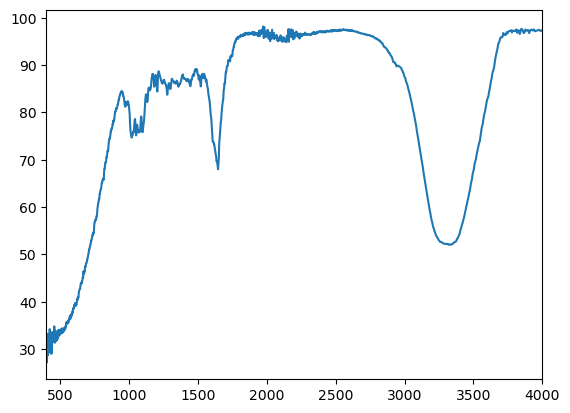

In [5]:
def plot_ir(df):
    fig, ax = plt.subplots()
    ax.plot(df.wavenumber, df.transmittance)
    # if transformed is False:
    ax.set_xlim(df.wavenumber.min(),df.wavenumber.max())


plot_ir(lem1)

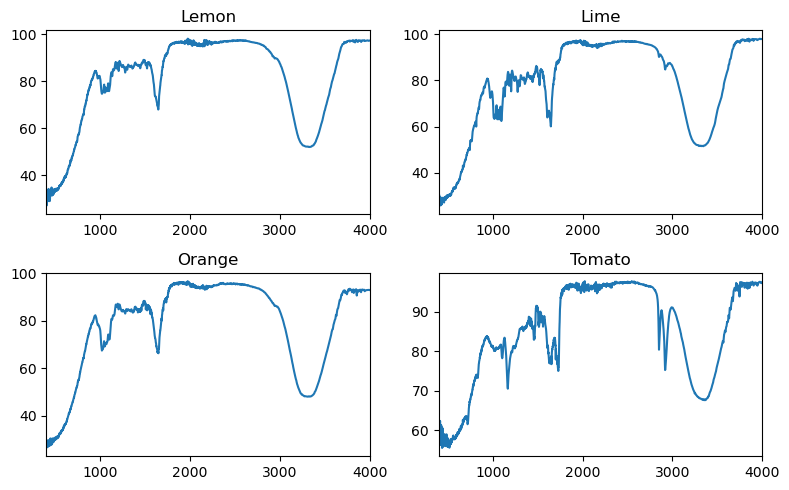

In [6]:
# plot 4 fruit
fig, axes = plt.subplots(2,2, figsize=(8,5))
(ax00,ax01),(ax10,ax11) = axes

ax00.plot(lem1.wavenumber, lem1.transmittance)
ax00.set_xlim(lem1.wavenumber.min(),lem1.wavenumber.max())
ax00.set_title('Lemon')

ax01.plot(lime2.wavenumber, lime2.transmittance)
ax01.set_xlim(lime2.wavenumber.min(),lime2.wavenumber.max())
ax01.set_title('Lime')

ax10.plot(orange3.wavenumber, orange3.transmittance)
ax10.set_xlim(orange3.wavenumber.min(),orange3.wavenumber.max())
ax10.set_title('Orange')

ax11.plot(tomato4.wavenumber, tomato4.transmittance)
ax11.set_xlim(tomato4.wavenumber.min(),tomato4.wavenumber.max())
ax11.set_title('Tomato')

fig.tight_layout()

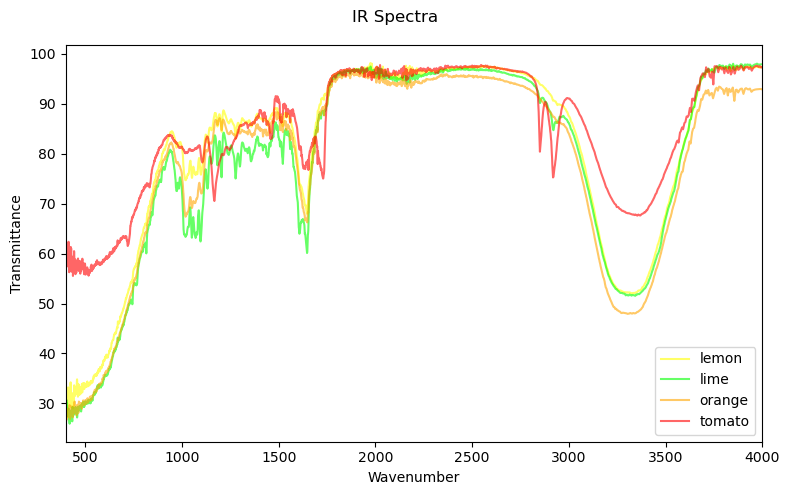

In [7]:
# plot 4 fruit on one graph
fig, ax = plt.subplots(figsize=(8,5))
(ax00,ax01),(ax10,ax11) = axes

alpha=0.6

ax.plot(lem1.wavenumber, lem1.transmittance, color='yellow', alpha=alpha, label='lemon')
ax.plot(lime2.wavenumber, lime2.transmittance, color='lime', alpha=alpha, label='lime')
ax.plot(orange3.wavenumber, orange3.transmittance, color='orange', alpha=alpha, label='orange')
ax.plot(tomato4.wavenumber, tomato4.transmittance, color='red', alpha=alpha, label='tomato')

ax.set_xlim(tomato4.wavenumber.min(),tomato4.wavenumber.max())
ax.legend()
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Transmittance')
fig.suptitle('IR Spectra')
# ax.set_title('Lemon')


fig.tight_layout()

In [8]:
# 40 LEMONS ARE MISSING
# sheet = pd.read_excel('./data/FTIR_aligned.xlsx',sheet_name='Lemon 1_1')
# sheet

# need the name of the 40 missing sheets
# it's from Lemon 1_1 to Lemon 40_1
missing_sheetnames = ['Lemon {}_1'.format(x) for x in np.arange(1,41)]
print(len(missing_sheetnames), missing_sheetnames)

40 ['Lemon 1_1', 'Lemon 2_1', 'Lemon 3_1', 'Lemon 4_1', 'Lemon 5_1', 'Lemon 6_1', 'Lemon 7_1', 'Lemon 8_1', 'Lemon 9_1', 'Lemon 10_1', 'Lemon 11_1', 'Lemon 12_1', 'Lemon 13_1', 'Lemon 14_1', 'Lemon 15_1', 'Lemon 16_1', 'Lemon 17_1', 'Lemon 18_1', 'Lemon 19_1', 'Lemon 20_1', 'Lemon 21_1', 'Lemon 22_1', 'Lemon 23_1', 'Lemon 24_1', 'Lemon 25_1', 'Lemon 26_1', 'Lemon 27_1', 'Lemon 28_1', 'Lemon 29_1', 'Lemon 30_1', 'Lemon 31_1', 'Lemon 32_1', 'Lemon 33_1', 'Lemon 34_1', 'Lemon 35_1', 'Lemon 36_1', 'Lemon 37_1', 'Lemon 38_1', 'Lemon 39_1', 'Lemon 40_1']


In [9]:
# scan all files innit
home = 'c:\\Users\\Andrew\\Desktop\\Modules\\Y3\\Y3 Sem2\\CHEM6164 AI and ML in Chemistry\\project'
os.chdir(home+'\data\FTIR_aligned')
# os.getcwd()
files = os.listdir()
print(files)

['Lemon 41_1.csv', 'Lemon 42_1.csv', 'Lemon 43_1.csv', 'Lemon 44_1.csv', 'Lemon 45_1.csv', 'Lemon 46_1.csv', 'Lemon 47_1.csv', 'Lemon 48_1.csv', 'Lemon 49_1.csv', 'Lemon 50_1.csv', 'Lemon 51_1.csv', 'Lemon 52_1.csv', 'Lemon 53_1.csv', 'Lemon 54_1.csv', 'Lemon 55_1.csv', 'Lemon 56_1.csv', 'Lemon 57_1.csv', 'Lemon 58_1.csv', 'Lemon 59_1.csv', 'Lemon 60_1.csv', 'Lime 10_1.csv', 'Lime 11_1.csv', 'Lime 12_1.csv', 'Lime 13_1.csv', 'Lime 14_1.csv', 'Lime 15_1.csv', 'Lime 16_1.csv', 'Lime 17_1.csv', 'Lime 18_1.csv', 'Lime 19_1.csv', 'Lime 1_1.csv', 'Lime 20_1.csv', 'Lime 21_1.csv', 'Lime 22_1.csv', 'Lime 23_1.csv', 'Lime 24_1.csv', 'Lime 25_1.csv', 'Lime 26_1.csv', 'Lime 27_1.csv', 'Lime 28_1.csv', 'Lime 29_1.csv', 'Lime 2_1.csv', 'Lime 30_1.csv', 'Lime 31_1.csv', 'Lime 32_1.csv', 'Lime 33_1.csv', 'Lime 34_1.csv', 'Lime 35_1.csv', 'Lime 36_1.csv', 'Lime 37_1.csv', 'Lime 38_1.csv', 'Lime 39_1.csv', 'Lime 3_1.csv', 'Lime 40_1.csv', 'Lime 41_1.csv', 'Lime 42_1.csv', 'Lime 43_1.csv', 'Lime 44_1.cs

In [10]:
# base = pd.DataFrame([], columns=lem1.index.to_list()+['label'])
# # print(base)

# for i, f in enumerate(files):
#     # if i<2:
#         label = f.split(' ')[0]
#         # print(label)
#         input = pd.read_csv(home+'/data/FTIR_aligned/'+f)
#         input.columns = lem1.columns

#         transm = input.transmittance
#         transm['label'] = label        
        
#         base = pd.concat([base,pd.DataFrame(transm).T],axis=0).reset_index(drop=True)
    
# base

In [11]:
# base2 = pd.DataFrame([], columns=lem1.index.to_list()+['label'])

# for i, name in enumerate(missing_sheetnames):
#     # if i<5:
#         label = name.split(' ')[0]

#         sheet = pd.read_excel('../FTIR_aligned.xlsx',sheet_name=name)
#         print(i,name,sheet.shape)
#         sheet.columns = lem1.columns

#         transm = sheet.transmittance
#         transm['label'] = label
#         base2 = pd.concat([base2,pd.DataFrame(transm).T],axis=0).reset_index(drop=True)


# base2

In [12]:
# base = pd.concat([base,base2],axis=0)
# base

In [13]:
# base.to_csv('../FTIR_full.csv')
# export once done w this mess

# 3. PCA

In [14]:
base = pd.read_csv('../FTIR_full.csv', index_col=0).sort_values(by=['label']).reset_index(drop=True)
base

,0,1,2,3,4,5,6,7,8,9,...,5028,5029,5030,5031,5032,5033,5034,5035,5036,label
0,31.677110,30.700996,30.881406,30.266898,28.409459,26.389786,26.259759,27.260534,27.791578,28.484754,...,98.083866,98.087737,98.085202,98.082667,98.080132,98.077597,98.076330,98.074780,98.072844,Lemon
1,32.574727,31.344717,30.925854,31.241399,31.208344,30.651700,29.708647,27.890894,26.801205,28.502140,...,98.241408,98.232865,98.234639,98.236414,98.238188,98.239962,98.240849,98.241934,98.243289,Lemon
2,32.469008,30.073799,29.557930,30.336288,31.779516,32.878280,32.519618,30.287858,27.960043,28.847863,...,98.029931,98.025962,98.026263,98.026563,98.026864,98.027164,98.027315,98.027498,98.027728,Lemon
3,34.004334,30.804650,26.729094,26.743943,29.413596,31.615792,32.422500,30.611224,27.662325,28.455170,...,98.701945,98.695148,98.697733,98.700318,98.702903,98.705489,98.706781,98.708361,98.710336,Lemon
4,31.559343,29.131764,28.773435,29.705139,30.858321,32.067611,32.493706,30.475759,26.995335,28.014108,...,98.138948,98.132359,98.135345,98.138332,98.141319,98.144305,98.145799,98.147624,98.149905,Lemon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,60.096969,60.329260,61.098432,61.279894,59.984716,59.407273,59.309143,59.328030,60.096850,59.371330,...,106.041034,106.054181,106.067327,106.080473,106.088361,106.098001,106.110052,106.125546,106.146204,Tomato
236,72.382243,73.464961,73.368151,73.789475,73.974760,73.895807,73.615034,73.099416,73.706026,74.080617,...,106.862163,106.868893,106.875623,106.882354,106.886392,106.891328,106.897497,106.905429,106.916006,Tomato
237,75.350732,76.081023,77.269657,77.387848,75.366093,74.333092,74.391065,74.362683,75.080110,75.421030,...,105.431423,105.439630,105.447838,105.456045,105.460970,105.466989,105.474512,105.484186,105.497083,Tomato
238,70.298908,71.639056,72.971503,71.950838,69.639503,69.864241,70.613884,70.459723,71.750778,72.335978,...,105.210130,105.233808,105.257486,105.281164,105.295371,105.312735,105.334440,105.362346,105.399554,Tomato


In [15]:
labels = base['label']
transmittance = base.iloc[:,:-1]

print(transmittance.isna().sum().sum()) # need to clear up nans
transmittance = transmittance.fillna(0)
print(transmittance.isna().sum().sum())


0
0


In [16]:
sc = StandardScaler()
sc_transmittance = sc.fit_transform(transmittance)
pd.DataFrame(sc_transmittance).head()


,0,1,2,3,4,5,6,7,8,9,...,5027,5028,5029,5030,5031,5032,5033,5034,5035,5036
0,-0.391455,-0.456775,-0.448182,-0.492832,-0.624038,-0.758039,-0.760048,-0.673451,-0.637197,-0.614104,...,-0.522932,-0.521389,-0.520644,-0.521591,-0.522533,-0.523547,-0.524445,-0.524849,-0.525330,-0.525910
1,-0.329285,-0.413289,-0.445168,-0.424966,-0.428905,-0.466664,-0.523762,-0.630321,-0.704050,-0.612920,...,-0.478663,-0.481393,-0.483821,-0.483686,-0.483546,-0.483476,-0.483293,-0.483159,-0.482985,-0.482748
2,-0.336607,-0.499146,-0.537919,-0.488000,-0.389084,-0.314439,-0.331180,-0.466320,-0.625825,-0.589381,...,-0.533921,-0.535082,-0.536317,-0.536541,-0.536760,-0.537052,-0.537227,-0.537269,-0.537308,-0.537335
3,-0.230268,-0.449773,-0.729727,-0.738178,-0.554031,-0.400751,-0.337834,-0.444195,-0.645922,-0.616118,...,-0.361909,-0.364472,-0.366530,-0.366221,-0.365909,-0.365659,-0.365303,-0.365092,-0.364825,-0.364476
4,-0.399612,-0.562785,-0.591112,-0.531954,-0.453308,-0.369862,-0.332956,-0.453464,-0.690946,-0.646148,...,-0.504879,-0.507405,-0.509322,-0.508872,-0.508418,-0.508035,-0.507537,-0.507245,-0.506876,-0.506395


In [17]:
# variance by no of components
comps = [2,3,5,10,20,30,50,100,150,200]
variances = []

for n_c in comps:
    pca = PCA(n_components=n_c)
    x = pca.fit_transform(sc_transmittance)
    var_ratios = pca.explained_variance_ratio_

    variances.append(var_ratios.sum())

summary = pd.DataFrame([comps, variances]).T
summary.columns = ['n_components','total_var']
summary

# first 10 components capture everything basically

,n_components,total_var
0,2.0,0.861678
1,3.0,0.948471
2,5.0,0.976681
3,10.0,0.991968
4,20.0,0.996393
5,30.0,0.997599
6,50.0,0.998497
7,100.0,0.999393
8,150.0,0.999762
9,200.0,0.999935


(0.0, 240.0)

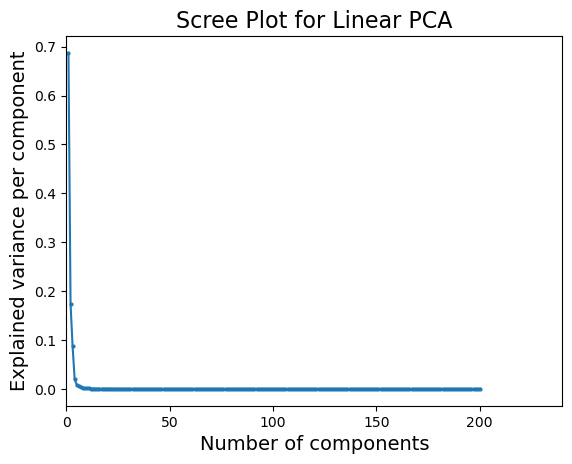

In [18]:
fig, ax = plt.subplots()
size=14
ax.plot(np.arange(1,var_ratios.shape[0]+1), var_ratios, marker='o', markersize=2)

ax.set_title('Scree Plot for Linear PCA', fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Explained variance per component', fontsize=size)

ax.set_xlim(0,sc_transmittance.shape[0])

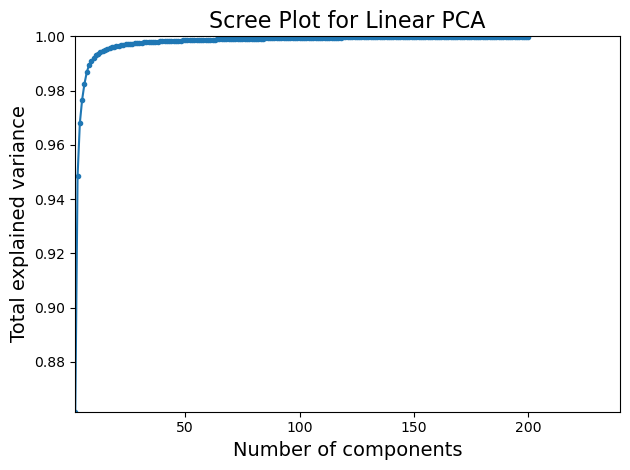

In [19]:
fig, ax = plt.subplots()
size=14
# ax.plot(summary.n_components, summary.total_var, marker='o')
ax.plot(np.arange(1,201), np.cumsum(var_ratios), marker='o', markersize=3)

ax.set_title('Scree Plot for Linear PCA', fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Total explained variance', fontsize=size)

ax.set_xlim(2,sc_transmittance.shape[0])
ax.set_ylim(summary.total_var[0],1)

fig.tight_layout()

In [20]:
le = LabelEncoder()
le.fit(base['label'])
print(list(le.classes_))
y = le.transform(base['label'])

['Lemon', 'Lime', 'Orange', 'Tomato']


In [21]:
var_ratios[0]

0.6872219714947

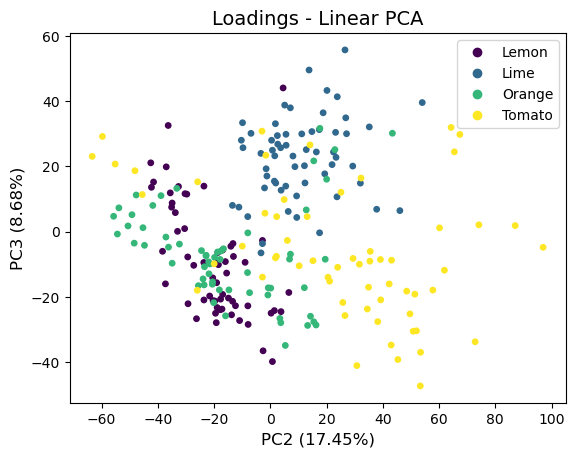

In [22]:
fig, ax = plt.subplots()
size = 12
ix = 1
iy = 2

scat = ax.scatter(x[:,ix],x[:,iy], c=y,s=15)
ax.legend(scat.legend_elements()[0], le.classes_)
ax.set_title('Loadings - Linear PCA', fontsize=size+2)

ax.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix],4)*100), fontsize=size)
ax.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy],4)*100), fontsize=size)

plt.show()

# lemon and lime are not very separable - makes sense
# show in report perhaps

# 6. Clustering

In [23]:
n_pc = 10 # chosen 5 PCs, probably enough
data = x[:,0:n_pc]
# a) clustering using 4 centroids
kmeans4 = KMeans(n_clusters=4, random_state=0)
kmeans4.fit(data)
# kmeans4.fit(x[:,1:n_pc])
centroids4 = kmeans4.cluster_centers_
predictions = kmeans4.predict(data)

silhouette_avg = silhouette_score(data,predictions)
print(silhouette_avg)

c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.38481171687198334


In [24]:
# need accuracy, but how?

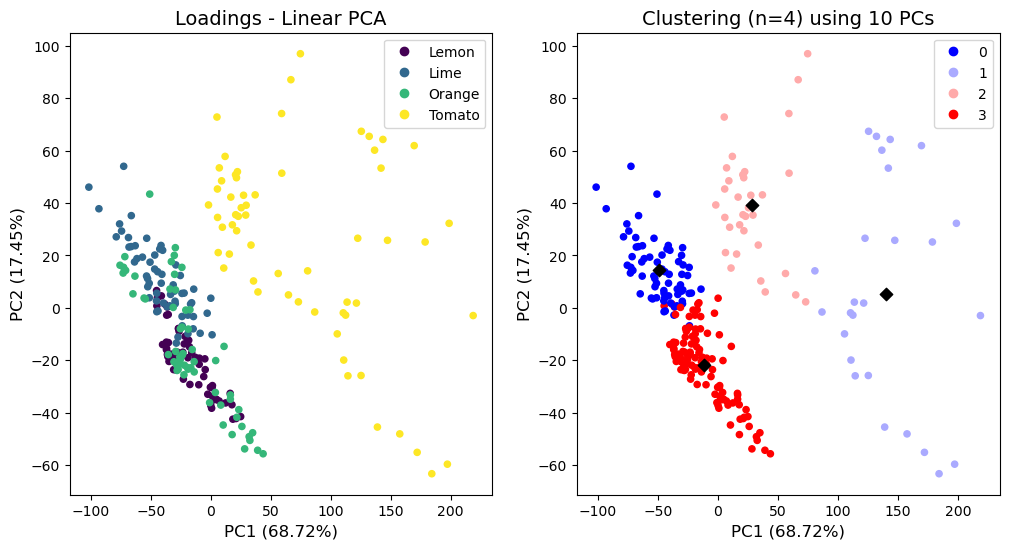

In [25]:
# side to side clusters vs reality
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
c = 4
size = 12
ix = 0
iy = 1
s=20

#left
scat0 = ax0.scatter(x[:,ix],x[:,iy], c=y, s=s)
ax0.legend(scat0.legend_elements()[0], le.classes_)
ax0.set_title('Loadings - Linear PCA', fontsize=size+2)

ax0.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
ax0.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

#right
scat1 = ax1.scatter(x[:,ix],x[:,iy], c=kmeans4.labels_, s=s, cmap='bwr') # copper, cmap='bwr'
ax1.legend(scat1.legend_elements()[0], set(kmeans4.labels_))

ax1.set_title('Clustering (n={}) using {} PCs'.format(c, n_pc), fontsize=size+2)

ax1.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
ax1.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

ax1.scatter(centroids4[:,0], centroids4[:,1], color='black', s=s*2, marker='D')

plt.show()

# could be better

In [26]:
# sensitivity to no of PCs
number_pcs = [2,3,5,10,20,30,50,100,150,200]
average_silh_scores = []

for n_pc in number_pcs:
    data = x[:,:n_pc]

    kmeans4 = KMeans(n_clusters=4)
    kmeans4_labels = kmeans4.fit_predict(data)

    silhouette_avg = silhouette_score(data,kmeans4_labels)
    # print("For {} PCs the mean Silhouette score is {:.3f}".format(n_pc,silhouette_avg))
    average_silh_scores.append(silhouette_avg)

pc_sensitivity = pd.DataFrame([pd.Series(number_pcs),pd.Series(average_silh_scores)]).T
pc_sensitivity.columns = ['PCs','Mean Silhouette coeff']
pc_sensitivity

c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_

,PCs,Mean Silhouette coeff
0,2.0,0.466410
1,3.0,0.416625
2,5.0,0.399303
3,10.0,0.384812
4,20.0,0.379945
5,30.0,0.378454
6,50.0,0.377327
7,100.0,0.376167
8,150.0,0.375670
9,200.0,0.375431


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=2 the average silhouette_score is 0.583


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=3 the average silhouette_score is 0.316


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=4 the average silhouette_score is 0.385


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=5 the average silhouette_score is 0.391


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=6 the average silhouette_score is 0.390


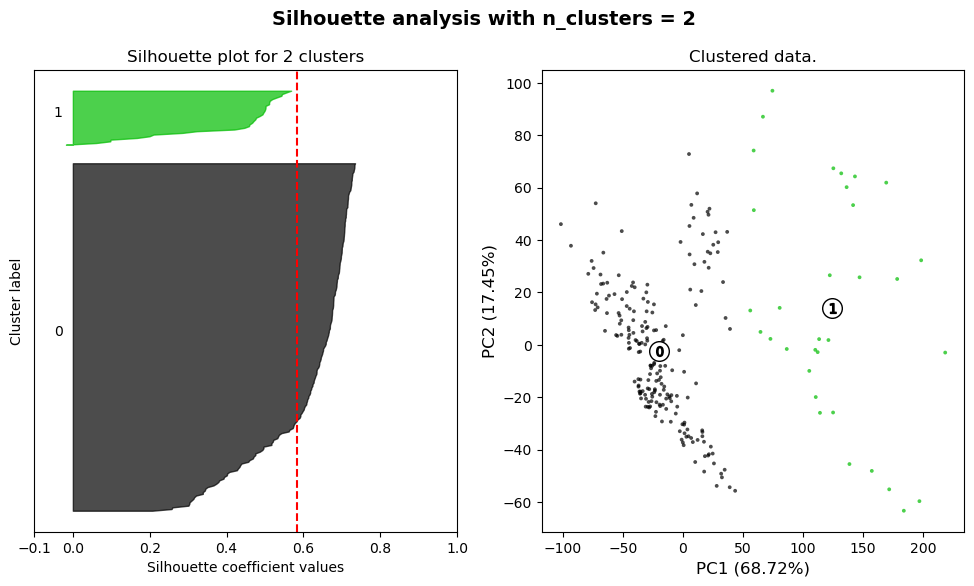

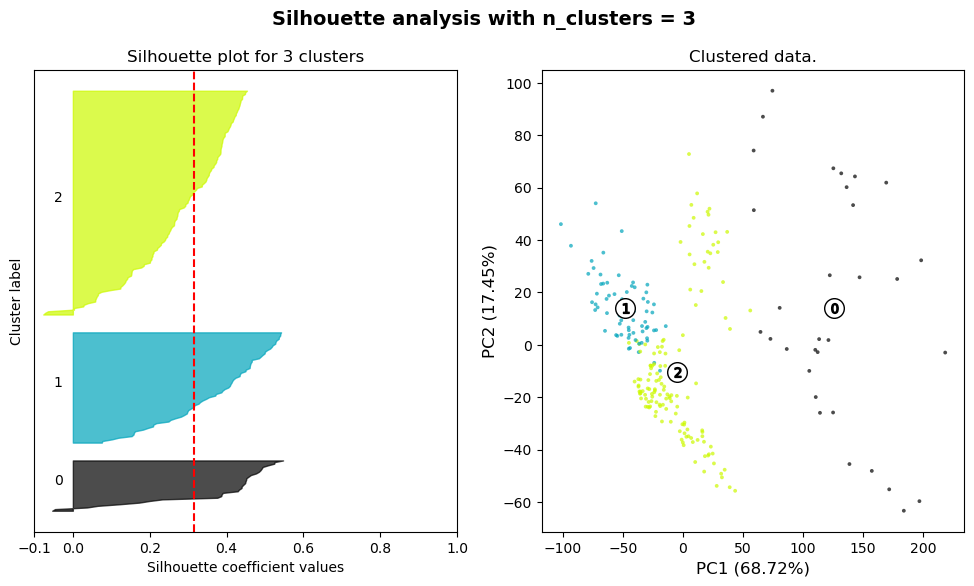

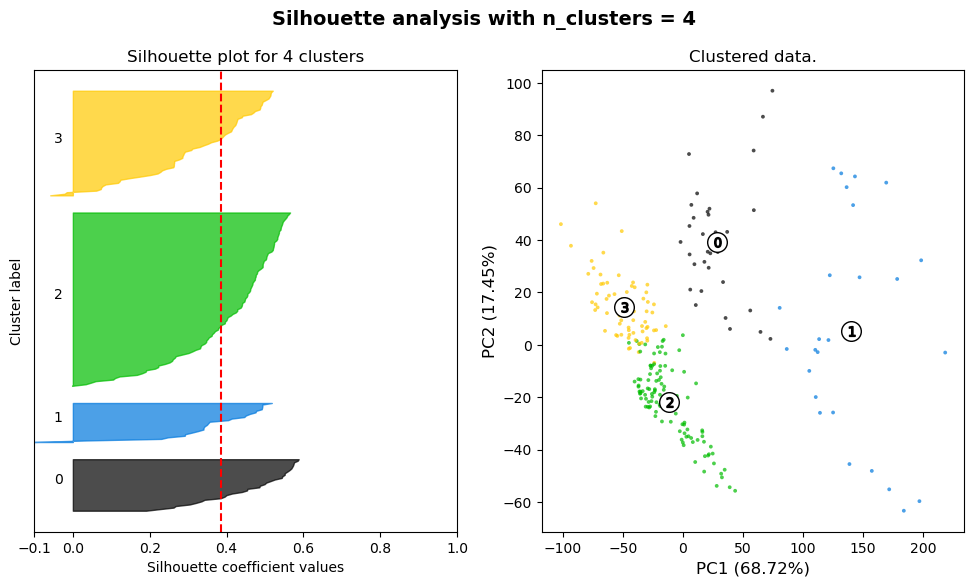

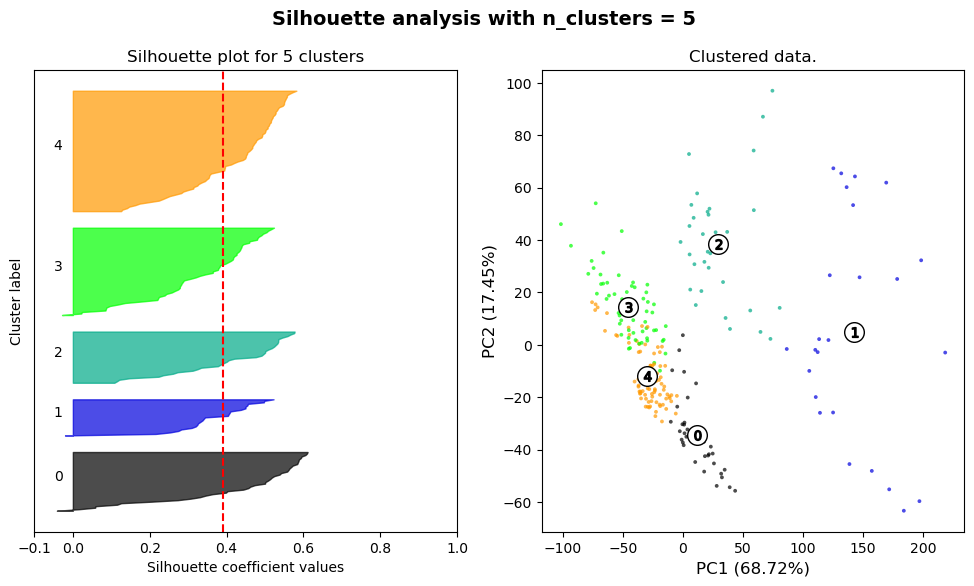

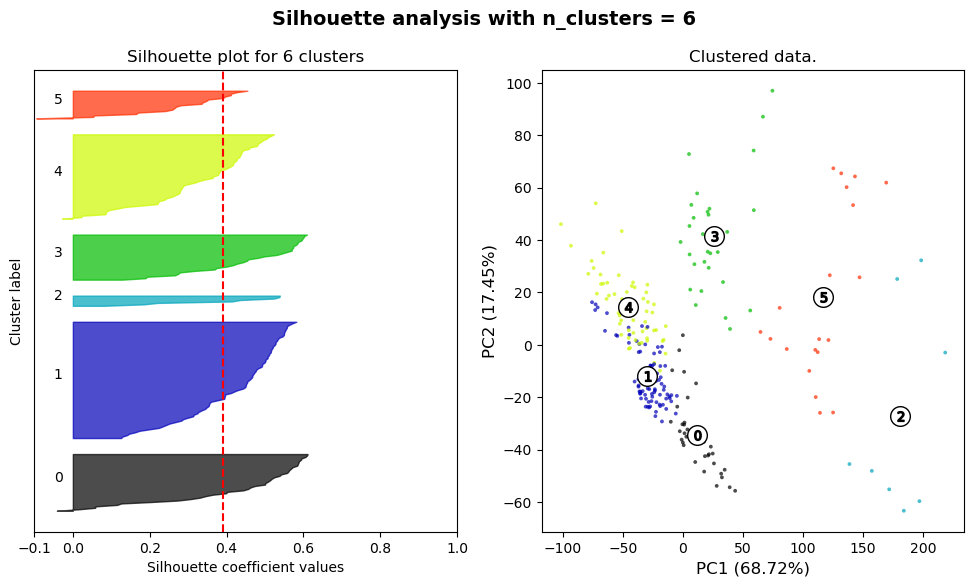

In [27]:
# testing the range of clusters
# source
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = [2,3,4,5,6]
n_pc = 10
x_pc = 0
y_pc = 1
k_sensitivities = []

data = x[:,:n_pc]
# data = x[:,1:n_pc]

for n_clusters in range_n_clusters:
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,6))

    ax0.set_xlim(-0.1,1)
    # ax0.set_ylim()

    clusterer = KMeans(n_clusters=n_clusters) #, n_init='auto', random_state=0)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    k_sensitivities.append(silhouette_avg)
    print('For n_clusters={} the average silhouette_score is {:.3f}'.format(n_clusters, silhouette_avg))

    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silh_vals = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silh_vals.sort()

        size_cluster_i = ith_cluster_silh_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        colour = cm.nipy_spectral(float(i)/n_clusters)
        ax0.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silh_vals,facecolor=colour,edgecolor=colour,alpha=0.7)
        ax0.text(-0.05, y_lower+0.5*size_cluster_i,str(i))
        y_lower = y_upper+10

    ax0.set_title("Silhouette plot for {} clusters".format(n_clusters))
    ax0.set_xlabel('Silhouette coefficient values')
    ax0.set_ylabel('Cluster label')

    ax0.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax0.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    ax0.set_yticks([])

    # right
    colours = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax1.scatter(x[:,x_pc],x[:,y_pc],marker='.',s=30,lw=00,alpha=0.7,c=colours,edgecolors='k')
    centroids = clusterer.cluster_centers_
    ax1.scatter(centroids[:,0], centroids[:,1],marker='o',c='white',alpha=1,s=200,edgecolors='k')

    for i, cl in enumerate(centroids):
        ax1.scatter(cl[0],cl[1],marker="$%d$" % i,alpha=1,s=50,edgecolors='k')

    ax1.set_title("Clustered data.")
    ax1.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
    ax1.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)


    plt.suptitle("Silhouette analysis with n_clusters = %d" % n_clusters,fontsize=14,fontweight="bold")

plt.show()

In [28]:
# 5 clusters is probably better than 4 cos then tomato takes up two classes

sixc = pd.DataFrame([range_n_clusters,k_sensitivities]).T
sixc.columns = ['k','Mean Silhouette coeff']
sixc

# score drop from 2-4 but then increases a bit

,k,Mean Silhouette coeff
0,2.0,0.583359
1,3.0,0.316049
2,4.0,0.384812
3,5.0,0.390722
4,6.0,0.389641


# 7. SVM

In [29]:
n_pc = 10
data = pd.DataFrame(x[:,:n_pc])
data['target'] = y
print(le.classes_)
data.sample(5)

['Lemon' 'Lime' 'Orange' 'Tomato']


,0,1,2,3,4,5,6,7,8,9,target
54,-44.911702,0.741930,-39.843628,7.747744,5.032055,-0.589956,-3.695119,-2.772568,-1.177250,-0.626214,0
45,-23.286512,-16.957547,-19.261251,3.324877,5.150181,-3.160876,2.063726,-0.876252,-1.686410,1.659661,0
213,20.767398,35.528272,-6.074038,-22.370451,-0.180419,-4.861980,-0.543269,2.098535,-1.096335,-2.188872,3
204,59.176784,51.389090,-19.186939,-2.216870,-0.462329,0.308144,-7.856297,-1.754542,-3.372247,-6.535097,3
61,-68.570824,26.815728,34.865886,-0.273196,-3.797872,-6.538138,3.057126,-4.470226,-1.418156,0.875564,1


In [30]:
# separable: tomato and orange
sep_data = data[data.target>1]
# non-separable: orange and lemon
nonsep_data = data[(data.target==0) | (data.target==2)] # | is OR operator

## Separable case

In [31]:
train_sep_X, test_sep_X, train_sep_y, test_sep_y = train_test_split(sep_data.iloc[:,:-1], sep_data.target, test_size=0.3,random_state=8)
print(train_sep_X.shape, test_sep_X.shape, train_sep_y.shape, test_sep_y.shape)

(84, 10) (36, 10) (84,) (36,)


In [32]:
data.target.value_counts()
# 40 lemons were missing, fixed it now 

0    60
1    60
2    60
3    60
Name: target, dtype: int64

In [33]:
test_sep_y.value_counts()

3    18
2    18
Name: target, dtype: int64

In [34]:
sc = StandardScaler()
sc_train_sep_X = sc.fit_transform(train_sep_X)
sc_test_sep_X = sc.transform(test_sep_X)

In [35]:
svc_sep = SVC(kernel='linear')
svc_sep.fit(sc_train_sep_X,train_sep_y)

pred_sep = svc_sep.predict(test_sep_X)
acc = accuracy_score(test_sep_y, pred_sep)
f1 = f1_score(test_sep_y, pred_sep, pos_label=2) # need to decide which one is true positive -> 2=orange, 3=tomato 

print(acc, f1)

1.0 1.0


In [36]:
# examine effect of C
cs = [0.001,0.01,0.1,0.5,1,3]
accuracies = []
f1s = []
precisions = []
recalls = []

pos_label = 2

for c in cs:
    clf = SVC(kernel='linear', C=c)
    clf.fit(sc_train_sep_X,train_sep_y)
    pred_sep = clf.predict(test_sep_X)

    acc = accuracy_score(test_sep_y, pred_sep)
    accuracies.append(acc)
    f1 = f1_score(test_sep_y, pred_sep, pos_label=pos_label)
    f1s.append(f1)
    prec = precision_score(test_sep_y,pred_sep, pos_label=pos_label)
    precisions.append(prec)
    rec = recall_score(test_sep_y,pred_sep, pos_label=pos_label)
    recalls.append(rec)

summary = pd.DataFrame([cs,accuracies,f1s, precisions, recalls]).T
summary.columns = ['C','Accuracy','F1 score','Precision','Recall']
summary

,C,Accuracy,F1 score,Precision,Recall
0,0.001,1.0,1.0,1.0,1.0
1,0.010,1.0,1.0,1.0,1.0
2,0.100,1.0,1.0,1.0,1.0
3,0.500,1.0,1.0,1.0,1.0
4,1.000,1.0,1.0,1.0,1.0
5,3.000,1.0,1.0,1.0,1.0


In [37]:
# recall = TP/TP+FN
# this means that some oranges get misclassified as tomatoes

In [38]:
# change size of train set, keep test set const
full_size = 70
red_size1 = 50
red_size2 = 30
train_sample_size = train_sep_X.shape[0]

split2 = int(train_sample_size*red_size1/full_size)
split1 = int(train_sample_size*red_size2/full_size)
print(train_sep_X.shape[0],split1, split2)

splits = [split1, split2, train_sample_size]
accuracies = []
f1s = []
precisions = []
recalls = []

for split in splits:
    sample_indices = train_sep_X.sample(split).index
    train_X = train_sep_X.loc[sample_indices]
    train_y = train_sep_y.loc[sample_indices]
    test_X = test_sep_X
    test_y = test_sep_y

    clf = SVC(kernel='linear',C=1)
    clf.fit(train_X, train_y)
    pred_sep = clf.predict(test_X)

    acc = accuracy_score(test_y, pred_sep)
    accuracies.append(acc)
    f1 = f1_score(test_y, pred_sep, pos_label=2)
    f1s.append(f1)
    prec = precision_score(test_y,pred_sep, pos_label=2)
    precisions.append(prec)
    rec = recall_score(test_y,pred_sep, pos_label=2)
    recalls.append(rec)

summary = pd.DataFrame([splits,accuracies,f1s, precisions, recalls]).T
summary.columns = ['#Training samples','Accuracy','F1 score','Precision','Recall']
summary

# still separable

84 36 60


,#Training samples,Accuracy,F1 score,Precision,Recall
0,36.0,1.0,1.0,1.0,1.0
1,60.0,1.0,1.0,1.0,1.0
2,84.0,1.0,1.0,1.0,1.0


In [39]:
# 7c
gammas = [1e-4,0.001,0.01,0.1,1,3,5,10]
accuracies = []
f1s = []
precisions = []
recalls = []

for gamma in gammas:
    clf = SVC(kernel='rbf', gamma=gamma)
    clf.fit(sc_train_sep_X,train_sep_y)
    pred_sep = clf.predict(test_sep_X)

    acc = accuracy_score(test_sep_y, pred_sep)
    accuracies.append(acc)
    f1 = f1_score(test_sep_y, pred_sep, pos_label=3)
    f1s.append(f1)
    prec = precision_score(test_sep_y,pred_sep, pos_label=3)
    precisions.append(prec)
    rec = recall_score(test_sep_y,pred_sep, pos_label=3)
    recalls.append(rec)

summary = pd.DataFrame([gammas,accuracies,f1s, precisions, recalls]).T
summary.columns = ['Gamma','Accuracy','F1 score','Precision','Recall']
summary


,Gamma,Accuracy,F1 score,Precision,Recall
0,0.0001,1.000000,1.000000,1.000000,1.0
1,0.0010,0.888889,0.900000,0.818182,1.0
2,0.0100,0.500000,0.666667,0.500000,1.0
3,0.1000,0.500000,0.666667,0.500000,1.0
4,1.0000,0.500000,0.666667,0.500000,1.0
5,3.0000,0.500000,0.666667,0.500000,1.0
6,5.0000,0.500000,0.666667,0.500000,1.0
7,10.0000,0.500000,0.666667,0.500000,1.0


In [40]:
pred_sep

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [41]:
# same thing occurs as for MS, clf thinks it's all one class
# why?
# need to visualise

## Non-separable case

In [42]:
nonsep_data.sample(5) # labels are 0 and 2

,0,1,2,3,4,5,6,7,8,9,target
142,-0.962146,-36.212372,-4.775246,-0.675461,-5.928669,2.540807,3.004100,-1.311718,4.813329,-2.798507,2
30,-40.170226,-14.042557,-4.505091,-5.702618,4.155100,-1.379232,3.357619,-4.841110,-0.247605,-0.205349,0
152,-35.375769,-17.867036,-8.539873,-2.896933,-2.538230,-0.437616,8.246696,0.100777,-1.599728,1.229697,2
37,-31.409442,-19.097458,-15.672450,-5.678296,8.261591,0.008155,4.853245,0.990938,-1.247338,1.321931,0
161,-73.026767,13.261244,-28.767086,1.502626,-0.261193,7.342562,-2.288612,1.112187,5.364416,-1.976856,2


In [43]:
train_nonsep_X, test_nonsep_X, train_nonsep_y, test_nonsep_y = train_test_split(nonsep_data.iloc[:,:-1], nonsep_data.target, test_size=0.3,random_state=22)
print(train_nonsep_X.shape, test_nonsep_X.shape, train_nonsep_y.shape, test_nonsep_y.shape)

(84, 10) (36, 10) (84,) (36,)


In [44]:
train_nonsep_y.value_counts()

2    42
0    42
Name: target, dtype: int64

In [45]:
sc = StandardScaler()
sc_train_nonsep_X = sc.fit_transform(train_nonsep_X)
sc_test_nonsep_X = sc.transform(test_nonsep_X)

In [46]:
# nonsep case
# examine effect of C
cs = [0.001,0.01,0.05,0.06,0.1,1,5,10]
accuracies = []
f1s = []
precisions = []
recalls = []

for c in cs:
    clf = SVC(kernel='linear', C=c)
    clf.fit(sc_train_nonsep_X,train_nonsep_y)
    pred_nonsep = clf.predict(test_nonsep_X)

    acc = accuracy_score(test_nonsep_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_nonsep_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_nonsep_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_nonsep_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([cs,accuracies,f1s, precisions, recalls]).T
summary.columns = ['C','Accuracy','F1 score','Precision','Recall']
summary


,C,Accuracy,F1 score,Precision,Recall
0,0.001,0.805556,0.837209,0.720000,1.000000
1,0.010,0.833333,0.850000,0.772727,0.944444
2,0.050,0.722222,0.642857,0.900000,0.500000
3,0.060,0.583333,0.347826,0.800000,0.222222
4,0.100,0.638889,0.480000,0.857143,0.333333
5,1.000,0.638889,0.434783,1.000000,0.277778
6,5.000,0.611111,0.416667,0.833333,0.277778
7,10.000,0.750000,0.689655,0.909091,0.555556


Text(0, 0.5, 'Accuracy')

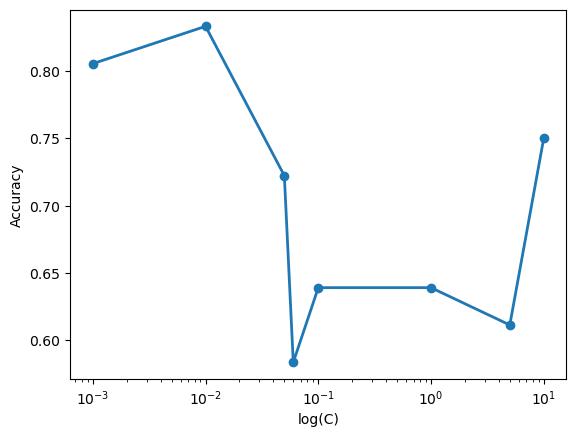

In [47]:
fig,ax = plt.subplots()

ax.plot(summary.C, summary.Accuracy, linewidth=2, marker='o')
ax.set_xscale('log')

ax.set_xlabel('log(C)')
ax.set_ylabel('Accuracy')

In [48]:
# as C goes up, acc and F1 seem to go down most of the time
# recall drops drastically -> lemons get misclassified as oranges

In [49]:
# nonsep case
# varied train set size
splits = [split1, split2, train_sample_size]
accuracies = []
f1s = []
precisions = []
recalls = []

for split in splits:
    sample_indices = train_nonsep_X.sample(split).index
    train_X = train_nonsep_X.loc[sample_indices]
    train_y = train_nonsep_y.loc[sample_indices]
    test_X = test_nonsep_X
    test_y = test_nonsep_y

    clf = SVC(kernel='linear',C=1)
    clf.fit(train_X, train_y)
    pred_nonsep = clf.predict(test_X)

    acc = accuracy_score(test_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([splits,accuracies,f1s, precisions, recalls]).T
summary.columns = ['#Training samples','Accuracy','F1 score','Precision','Recall']
summary

,#Training samples,Accuracy,F1 score,Precision,Recall
0,36.0,0.916667,0.914286,0.941176,0.888889
1,60.0,0.944444,0.947368,0.900000,1.000000
2,84.0,0.972222,0.972973,0.947368,1.000000


In [50]:
# some variation showing that less data has less predictive power

In [51]:
# nonsep case
# examine effect of gamme, use rbf kernel
gammas = [1e-5,1e-4,0.001,0.01,0.1,1,3,5,10]
accuracies = []
f1s = []
precisions = []
recalls = []

for gamma in gammas:
    clf = SVC(kernel='rbf', C=1, gamma=gamma)
    clf.fit(sc_train_nonsep_X,train_nonsep_y)
    pred_nonsep = clf.predict(test_nonsep_X)

    acc = accuracy_score(test_nonsep_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_nonsep_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_nonsep_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_nonsep_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([gammas,accuracies,f1s, precisions, recalls]).T
summary.columns = ['Gamma','Accuracy','F1 score','Precision','Recall']
summary


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Gamma,Accuracy,F1 score,Precision,Recall
0,0.00001,0.805556,0.837209,0.720000,1.000000
1,0.00010,0.805556,0.837209,0.720000,1.000000
2,0.00100,0.805556,0.820513,0.761905,0.888889
3,0.01000,0.500000,0.000000,0.000000,0.000000
4,0.10000,0.500000,0.000000,0.000000,0.000000
5,1.00000,0.500000,0.666667,0.500000,1.000000
6,3.00000,0.500000,0.666667,0.500000,1.000000
7,5.00000,0.500000,0.666667,0.500000,1.000000
8,10.00000,0.500000,0.666667,0.500000,1.000000


In [52]:
# above gamma=0.001, rbf svm classifies everything into
# one class -> that's why f1 and acc are all the same
pred_nonsep

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
nonsep_data.iloc[:,:10]

,0,1,2,3,4,5,6,7,8,9
0,-15.880343,-17.196315,-23.754869,8.001010,2.725374,2.515867,-2.852299,4.605567,0.515784,3.090087
1,-17.728951,-14.896844,-20.387183,5.852245,2.672984,4.161431,-5.473520,-0.176451,-2.131338,-0.233272
2,-19.880455,-13.430402,-21.376920,5.446973,3.508508,5.539538,-6.261837,-0.380365,-1.812172,1.056431
3,-10.841222,-20.374057,-21.159251,6.069634,-1.803279,4.940948,-6.730740,-2.496863,-2.782259,2.794041
4,-22.120743,-13.794670,-25.509613,5.174078,4.016908,1.695582,-4.525444,-3.341972,-3.157244,3.169560
...,...,...,...,...,...,...,...,...,...,...
175,-50.872992,43.400939,30.137059,23.575030,-14.450471,-6.398894,-0.417094,8.446416,-0.831472,-0.385537
176,-54.540479,3.389499,-26.612093,2.765371,-1.955318,7.896738,-1.653922,2.063877,3.400335,-1.611561
177,-18.854991,-23.415241,-10.778890,-0.747362,0.789990,3.755280,2.990499,2.133810,-0.988793,0.716581
178,-31.304802,0.142285,-17.329437,12.886249,-3.922686,-0.868131,-1.465156,2.553262,-3.247576,-2.401024


In [54]:
# effect of no of pcs? HALO
# need to split again
no_pcs = np.arange(1,11)
accuracies = []
f1s = []
precisions = []
recalls = []

pos_label = 2


for npc in no_pcs:

    clf = SVC(kernel='linear', C=0.01)
    clf.fit(sc_train_nonsep_X[:,0:npc],train_nonsep_y)
    pred_nonsep = clf.predict(sc_test_nonsep_X[:,0:npc])

    acc = accuracy_score(test_nonsep_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_nonsep_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_nonsep_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_nonsep_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([no_pcs,accuracies,f1s, precisions, recalls]).T
summary.columns = ['#PCs','Accuracy','F1 score','Precision','Recall']
summary

,#PCs,Accuracy,F1 score,Precision,Recall
0,1.0,0.416667,0.400000,0.411765,0.388889
1,2.0,0.611111,0.681818,0.576923,0.833333
2,3.0,0.583333,0.705882,0.545455,1.000000
3,4.0,0.527778,0.679245,0.514286,1.000000
4,5.0,0.555556,0.692308,0.529412,1.000000
5,6.0,0.555556,0.692308,0.529412,1.000000
6,7.0,0.555556,0.692308,0.529412,1.000000
7,8.0,0.555556,0.692308,0.529412,1.000000
8,9.0,0.750000,0.800000,0.666667,1.000000
9,10.0,0.833333,0.857143,0.750000,1.000000


In [55]:
# there we go